In [ ]:
!which python

In [ ]:
# import the following libraries for our web scraping project

import requests # to make https requests
from bs4 import BeautifulSoup # our web scraping library

import pandas as pd # for making dataframe later

In [ ]:
# save the data from the website as a "soup" object

site = requests.get('https://translegislation.com/bills/2024/US') # gets the URL
html_code = site.content # saves the HTML code
soup = BeautifulSoup(html_code, 'lxml') # creates a soup object

In [ ]:
# runs the loop on the bill cards
bill_cards = soup.find_all('div', class_ ='css-4rck61')

# creating empty lists to hold all of our data
titles = []
captions = []
categories = []
descriptions = []

# extracting the data from the bill cards
for item in bill_cards:
    title = item.h3.text
    category = item.find('span').text
    caption = item.h2.text
    if item.h2.text is not None:
        description = item.h2.text
    else:
        description = 'No bill description'
    
    # adding the items to the empty lists
    titles.append(title)
    categories.append(category)
    captions.append(caption)
    descriptions.append(description)
    # remember that "legiscan_links" is already saved as a list, so we don't have to create it here

In [ ]:
urls24 = []
for item in bill_cards:
    extension = 'https://translegislation.com/' + item.a['href']
    urls24.append(extension)

# making a soup object of *every* page that is linked
# this may take several seconds
soups = []
for item in urls24:
    site = requests.get(item)
    html_code = site.content
    soup = BeautifulSoup(html_code, 'lxml')
    soups.append(soup)


legiscan_links = []
congress_links = []
for item in soups:
    # we are getting two links here, one to legiscan and one to the congress website
    links = item.find_all('a', class_='chakra-link css-oga2ct')
    anchor1 = links[0]['href'] # link to legiscan
    legiscan_links.append(anchor1)
    anchor2 = links[1]['href'] # link to congress
    congress_links.append(anchor2)

In [ ]:
# creating a dataframe, with separate columns to hold each of our lists
df24 = pd.DataFrame(
    {'title': titles,
     'caption': captions,
     'category': categories,
     'description': descriptions,
     'url': urls24,
     'legiscan': legiscan_links,
     'congress': congress_links
    })

In [ ]:
df24.info()

In [ ]:
df24.head()

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

In [ ]:
df24.to_csv('/Users/michaelajackson/Desktop/Antitrans/GA-Trans-Leg/2024CSV')

In [ ]:
#restarting the process for 2025
site25 = requests.get('https://translegislation.com/bills/2025/US') # gets the URL
html_code25 = site25.content # saves the HTML code
soup25 = BeautifulSoup(html_code25, 'lxml') # creates a soup object

In [ ]:
# runs the loop on the bill cards
bill_cards25 = soup25.find_all('div', class_ ='css-4rck61')

# creating empty lists to hold all of our data
titles25 = []
captions25 = []
categories25 = []
descriptions25 = []

# extracting the data from the bill cards
for item in bill_cards25:
    title25 = item.h3.text
    category25 = item.find('span').text
    caption25 = item.h2.text
    if item.h2.text is not None:
        description25 = item.h2.text
    else:
        description25 = 'No bill description'
    
    # adding the items to the empty lists
    titles25.append(title25)
    categories25.append(category25)
    captions25.append(caption25)
    descriptions25.append(description25)
    # remember that "legiscan_links" is already saved as a list, so we don't have to create it here

In [ ]:
urls25 = []
for item in bill_cards25:
    extension25 = 'https://translegislation.com/' + item.a['href']
    urls25.append(extension25)

# making a soup object of *every* page that is linked
# this may take several seconds
soups25 = []
for item in urls25:
    site25 = requests.get(item)
    html_code25 = site25.content
    soup25 = BeautifulSoup(html_code25, 'lxml')
    soups25.append(soup25)

legiscan_links25 = []
for item in soups25:
    # we are getting two links here, one to legiscan and one to the congress website and adding if statement for bills with no links
    links25 = item.find_all('a', class_='chakra-link css-oga2ct')
    # Default values
  #  legiscan_link = "Not available"
  #  congress_link = "Not available"
    
    # Check each link
 #   for link in links25:
   #     href = link.get('href', '')
        # If it’s a Legiscan link
   #     if "legiscan.com" in href:
   #         legiscan_link = href
        # If it’s a Congress link
   #     elif "congress.gov" in href:
    #         congress_link = href

    # legiscan_links.append(legiscan_link)
    # congress_links.append(congress_link)

In [ ]:
for item in links25:
    print(links25)

In [ ]:
len(links25)

In [ ]:
congress_links25 = []

for item in soups25:
    links25 = item.find_all('a', class_='chakra-link css-oga2ct')
    for link in links25:
        href = link.get("href")
        if href and "congress.gov" in href:
            congress_links25.append(href)

print(len(congress_links25))

In [ ]:
print(congress_links25)

In [ ]:
# creating a dataframe, with separate columns to hold each of our lists
df25 = pd.DataFrame(
    {'title': titles25,
     'caption': captions25,
     'category': categories25,
     'description': descriptions25,
     'url': urls25,
     'congress': congress_links25
    })

In [ ]:
df25.info()

In [ ]:
df25.head()

In [ ]:
df25.to_csv('/Users/michaelajackson/Desktop/Antitrans/GA-Trans-Leg/2025CSV')

In [ ]:
df24.drop('legiscan', axis=1, inplace=True)

In [ ]:
#combining both dfs into 1
df_combined = pd.concat([df24, df25], ignore_index=True)

In [ ]:
df_combined.head()

In [ ]:
#creating new column named "session" that pulls the congress session number (either 118 or 119) from the urls in congress column
import re

# Function to extract the Congress session from a URL
def extract_session(url):
    match = re.search(r'/(\d+)(?:th)?-congress/', url)
    return int(match.group(1)) if match else None

In [ ]:
df_combined['session'] = df_combined['congress'].apply(extract_session)

In [ ]:
print(df_combined['session'].unique())

In [ ]:
#sorting values by session number in congress url
df_combined.sort_values(by='session', ascending=True, inplace=True)
df_combined.tail()

In [ ]:
#Government website has bot blocks to the code in the block does not work

# Create a new column with "/all-info" replaced by "/text"
#df_combined['text'] = df_combined['congress'].str.replace('/all-info', '/text/is?format=txt', regex=False)

#print(df_combined['text'][30])

#df_combined.info()

#df_combined.head()

#creating function for extracting text from links in text cloumn

#def extract_text(url):
   # try:
   #     sitetext = requests.get(url) # gets the URL
   #     html_codetext = sitetext.content # saves the HTML code
   #     souptext = BeautifulSoup(html_codetext, 'lxml') # creates a soup object

# Find the <pre> tag containing the bill text
     #   bill_text = souptext.find('pre', {'id': 'billTextContainer'})
        
      #  return bill_text.get_text(strip=True) if bill_text else "Bill text not found"
  #  except requests.RequestException as e:
      #  return f"Error: {e}"  # Handle request errors for sites with pdfs instead of html

#df_combined['bill_text'] = df_combined['text'].apply(extract_text)

In [ ]:
df_combined.sample(20)

In [ ]:
df_combined.info()

In [ ]:
df_combined['congress'].duplicated().sum()

In [ ]:
df_combined.loc[110, 'congress']

In [ ]:
# extract the number and put into a separate list for urls later
numbers = []
for row in df_combined['title']:
    splitted = row.split()
    for item in splitted:
        numeric_part = ''.join(filter(str.isdigit, item))
        if numeric_part:
            numbers.append(numeric_part)


In [ ]:
len(numbers)

In [ ]:
numbers[:10]

In [ ]:
df_combined['bill_num'] = numbers

In [ ]:
df_combined.sample(6)

In [ ]:
#house vs senate resolution
bill_type = []
bill_type = df_combined['congress'].str.extract(r'(house-bill|senate-bill|house-resolution|senate-resolution)', expand=False)

In [ ]:
df_combined['bill_type'] = bill_type

In [ ]:
missing_types = df_combined[df_combined['bill_type'].isnull()]
missing_types

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
#manually entering missing bill types

df_combined.loc[56, 'bill_type'] = 'house-joint-resolution'
df_combined.loc[55, 'bill_type'] = 'house-joint-resolution'
df_combined.loc[84, 'bill_type'] = 'senate-joint-resolution'
df_combined.loc[83, 'bill_type'] = 'senate-joint-resolution'

In [ ]:
map_code = {
    'house-bill': 'hr',
    'senate-bill': 's',
    'house-resolution': 'hres',
    'senate-resolution': 'sres',
    'house-joint-resolution': 'hjres',
    'senate-joint-resolution': 'sjres'
}

In [ ]:
df_combined['bill_code'] = df_combined['bill_type'].map(map_code)

In [ ]:
missing_codes = df_combined[df_combined['bill_code'].isnull()]
missing_codes

In [ ]:

def xml_links(numbers, sessions, bill_code):
    urls = []
    for num, session, code in zip(numbers, sessions, bill_code):
            suffix = 'ih' if code.startswith('h') else 'is'
            url = f'https://www.congress.gov/{session}/bills/{code}{num}/BILLS-{session}{code}{num}{suffix}.xml'
                #example- https://www.congress.gov/119/bills/hr1015/BILLS-119hr1015ih.xml
                #example- https://www.congress.gov/119/bills/hres157/BILLS-119hres157ih.xml
                #example- https://www.congress.gov/119/bills/s209/BILLS-119s209is.xml
                #example- https://www.congress.gov/119/bills/sres22/BILLS-119sres22is.xml

            try:
                response = requests.get(url)
                if response.status_code == 200:
                    urls.append(url)
                else:
                    urls.append(None)
            except:
                urls.append(None)
            
    return urls

In [ ]:
urls = xml_links(
    df_combined['bill_num'],
    df_combined['session'],
    df_combined['bill_code']
)

In [ ]:
assert len(urls) == len(df_combined)

In [ ]:
#applying above
df_combined['xml_url'] = urls

In [ ]:
df_combined.head()

In [ ]:
df_combined['xml_url'].isnull().sum()

In [ ]:
missing_urls = df_combined[df_combined['xml_url'].isnull()]
missing_urls

In [ ]:
#manually replacing missing urls
#As of 03/28/2025 text has not been received for H.R.2197 or H.R. 2202
df_combined.loc[40, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8580/BILLS-118hr8580pcs.xml'
df_combined.loc[42, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8752/BILLS-118hr8752eh.xml'
df_combined.loc[43, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8771/BILLS-118hr8771pcs.xml'
df_combined.loc[44, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8774/BILLS-118hr8774pcs.xml'
df_combined.loc[47, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8998/BILLS-118hr8998pcs.xml'
df_combined.loc[48, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9026/BILLS-118hr9026rh.xml'
df_combined.loc[49, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9027/BILLS-118hr9027rh.xml'
df_combined.loc[50, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9028/BILLS-118hr9028rh.xml'
df_combined.loc[51, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9029/BILLS-118hr9029rh.xml'
df_combined.loc[46, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8997/BILLS-118hr8997rh.xml'
df_combined.loc[78, 'xml_url'] = 'https://www.congress.gov/118/bills/s4638/BILLS-118s4638rs.xml'
df_combined.loc[61, 'xml_url'] = 'https://www.congress.gov/118/bills/hres298/BILLS-118hres298eh.xml'
df_combined.loc[19, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4367/BILLS-118hr4367eh.xml'
df_combined.loc[18, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4365/BILLS-118hr4365pcs.xml'
df_combined.loc[21, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4665/BILLS-118hr4665pcs.xml'
df_combined.loc[22, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4821/BILLS-118hr4821pcs.xml'
df_combined.loc[119, 'xml_url'] = 'https://www.congress.gov/119/bills/s9/BILLS-119s9pcs.xml'

In [ ]:
# function that contains a loop to insert bill numbers
# into the URL, then to grab the content and add to a new list
def scrape_bill_text(urls):
    return [
        requests.get(url).text if pd.notnull(url) else None
        for url in urls]


In [ ]:
#checking if function works
xml_text = scrape_bill_text(df_combined['xml_url'])

In [ ]:
xml_text[0]

In [ ]:
with open('Bill_text.txt', 'w', encoding='utf-8') as f:
    for item in xml_text:
        f.write(str(item) + '\n')

In [ ]:
#Cleaning full text 

In [1]:
# loading up the texts that we just saved
load = open('./Bill_text.txt')
data = load.read()
load.close()

In [3]:
from bs4 import BeautifulSoup

In [9]:
# remove all the characters in the "take out" list by writing a
# loop that replaces those characters with an empty character, ''
def clean_up(text):
    take_out = ['\n', '/n', '\\n', '_', '[', ']', '<html><body><pre>', '</pre></body></html>', '  ']
    for item in take_out:
        if item in text:
            text = text.replace(item, '')
    return text

# Step 1: Load full file content and split by blank lines between bills
with open('Bill_text.txt', 'r', encoding='utf-8') as f:
    raw_data = f.read()

# Step 2: Split on double newlines to separate each bill
raw_bills = [b for b in raw_data.split('\n\n') if b.strip() != '']  # filters out empty blocks

# Step 3: Process each bill
cleaned_bills = []
for block in raw_bills:
    soup = BeautifulSoup(block, 'xml')
    raw_text = soup.get_text(separator=' ', strip=True)
    cleaned = clean_up(raw_text)
    if cleaned.strip():  # skip if completely empty
        cleaned_bills.append(cleaned)

In [13]:
type(cleaned_bills)

list

In [15]:
cleaned_bills[0:3000]

['118 HR 10075 IH: Stopping the Mutilation of Children Act of 2024 U.S. House of Representatives 2024-10-29 text/xml EN Pursuant to Title 17 Section 105 of the United States Code, this file is not subject to copyright protection and is in the public domain. I 118th CONGRESS 2d Session H. R. 10075 IN THE HOUSE OF REPRESENTATIVES October 29, 2024 Mr. Ogles (for himself and Mrs. Miller of Illinois ) introduced the following bill; which was referred to the Committee on Energy and Commerce A BILL To prohibit an entity from receiving Federal funds if such entity provides to any person any medical or surgical intervention for the purpose of assisting an individual’s disassociation from his or her sex. 1. Short title This Act may be cited as the Stopping the Mutilation of Children Act of 2024 . 2. Prohibition (a) In General Notwithstanding any other provision of law, no Federal funds may be provided, directly or indirectly, to an entity which provides to any person any medical or surgical inte

In [17]:
# Step 3: Join and write all cleaned bill text to a new file
with open('cleaned_text.txt', 'w', encoding='utf-8') as f:
    for bill in cleaned_bills:
        f.write(bill + '\n\n')  # Add space between each bill

In [ ]:
#word cloud visualization for common words in bill title

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


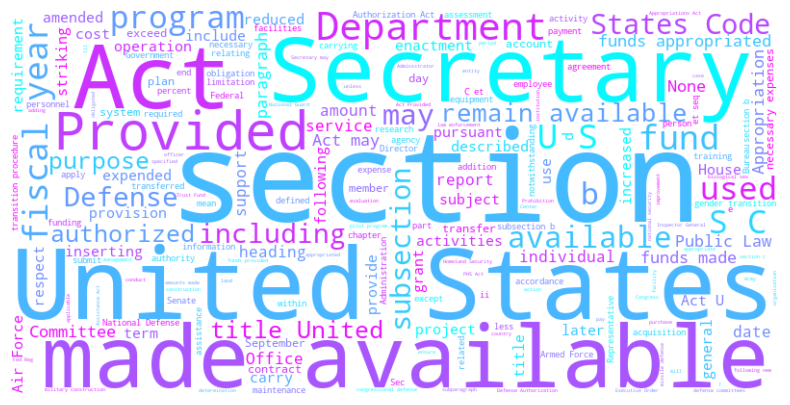

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all bills into a single string
full_text = ' '.join(cleaned_bills)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='cool'
).generate(full_text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

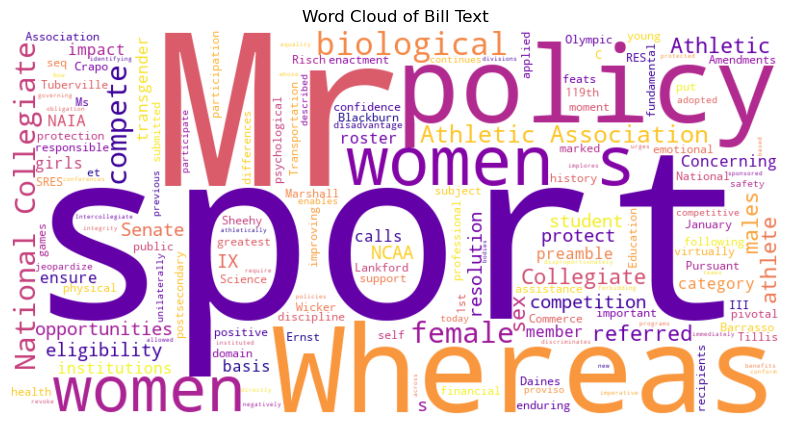

In [25]:
stopwords = set(STOPWORDS)
#May add more stopwords if needed
stopwords.update(['section', 'act', 'shall', 'may', 'bill', 'Title', 'Federal','House','xml','Committee','Session','United','States','b',
                  'Representatives','U','copyright','file', 'will', 'H', 'text', 'purposes', 'EN', 'Code', 'CONGRESS'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    colormap='plasma'
).generate(cleaned)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Bill Text")
plt.show()

In [1]:
load = open('./cleaned_text.txt')
data = load.read()
load.close()

In [5]:
pip uninstall -y spacy thinc pydantic confection catalogue

Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5
Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: pydantic 1.10.22
Uninstalling pydantic-1.10.22:
  Successfully uninstalled pydantic-1.10.22
Found existing installation: confection 0.1.5
Uninstalling confection-0.1.5:
  Successfully uninstalled confection-0.1.5
Found existing installation: catalogue 2.0.10
Uninstalling catalogue-2.0.10:
  Successfully uninstalled catalogue-2.0.10
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install "spacy>=3.7.2"

  Using cached spacy-3.8.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.3.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 3.9 MB/s eta 0:00:00ta 0:00:01
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
Using cached spacy-3.8.5-cp312-cp312-macosx_11_0_arm64.whl (6.0 MB)
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached thinc-8.3.6-cp312-cp312-macosx_11_0_arm64.whl (839 kB)
Using cached confection-0.1.5-py3-none-any.whl (35 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing

In [9]:
pip install "pydantic<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.3
    Uninstalling pydantic-2.5.3:
      Successfully uninstalled pydantic-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires pydantic<3.0.0,>=2.0.0, but you have pydantic 1.10.22 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import our matcher class
import spacy
from spacy.matcher import Matcher

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
len(cleaned)

In [ ]:
cleaned[:1000]

In [ ]:
texts = text.split('b"Congressional Bills 118th Congress')

In [ ]:
len(texts)

In [ ]:
texts[3]

In [ ]:
# create an entity ruler to label gender terms as "gender", etc

ruler = nlp.add_pipe("entity_ruler", after="ner")

patterns = [
                {"label": "SEX", "pattern": [{'LOWER': 'biological'}, {'LOWER': 'sex'}]},
                {"label": "SEX", "pattern": 'biological'},
                {"label": "SEX", "pattern": [{'LOWER': 'cross'}, {'IS_PUNCT': True}, {'LOWER': 'sex'}]},
                {"label": "SEX", "pattern": [{'LOWER': 'opposite'}, {'LOWER': 'sex'}]},
                {"label": "SEX", "pattern": 'sex'},
                {"label": "SEX", "pattern": [{'LOWER': 'trans'}, {'IS_PUNCT': True}, {'LOWER': 'sexual'}]},
                {"label": "SEX", "pattern": [{'LOWER': 'trans'}, {'LOWER': 'sexual'}]},
                {"label": "SEX", "pattern": 'transsexual'},
                {"label": "GENDER", "pattern": 'genderqueer'},
                {"label": "GENDER", "pattern": 'gender'},
                {"label": "GENDER", "pattern": 'transgender'},
                {"label": "GENDER", "pattern": [{'LOWER': 'trans'}, {'IS_PUNCT': True}, {'LOWER': 'gender'}]},
                {"label": "GENDER", "pattern": [{'LOWER': 'trans'}, {'LOWER': 'gender'}]},
                {"label": "GENDER", "pattern": 'trans'},
                {"label": "GENDER", "pattern": [{'LOWER': 'non'}, {'IS_PUNCT': True}, {'LOWER': 'binary'}]},
                {"label": "GENDER", "pattern": [{'LOWER': 'non'}, {'LOWER': 'binary'}]},
                {"label": "GENDER", "pattern": 'nonbinary'},
                {"label": "GENDER", "pattern": 'male'},
                {"label": "GENDER", "pattern": 'female'},
                {"label": "SEXUALITY", "pattern": 'sexuality'},
                {"label": "SEXUALITY", "pattern": 'orientation'},
                {"label": "SEXUALITY", "pattern": 'lgbt'},
                {"label": "SEXUALITY", "pattern": 'lgbt+'},
                {"label": "SEXUALITY", "pattern": 'lgbtqia+'},
                {"label": "SEXUALITY", "pattern": 'queer'}
            ]

ruler.add_patterns(patterns)

In [ ]:
nlp.pipe_names

In [ ]:
texts = ''.join(texts)

In [ ]:
len(texts)